This notebook runs a pipeline with the following steps:
* Create a test Visibility dataset.
   * No visibility sample noise. Just testing that things are working exactly as expected.
   * Using the GLEAM sky model and a common everybeam station beam model.
   * Add complex Gaussian noise corruptions to station gains and leakage.
   * Impose a $\lambda^{2}$-dependent rotate on each station Jones matrix.
   * Write to disk in MSv2 format.
* Read MSv2 data into Visibility dataset.$^{*}$
* Predict model visibilities (using GLEAM and everybeam).$^{*}$
* Do polarised bandpass calibration.$^{*}$
* Fit for the  $\lambda^{2}$-dependent rotation of each station.
* Redo polarised bandpass calibration.$^{*}$
* Apply calibration solutions to dataset and check for convergence.$^{*}$

\* xarray dataset map_blocks() is used to distribute frequency sub-bands across dask tasks.

In [1]:
from ska_sdp_instrumental_calibration.workflow.pipelines import (
    bandpass_polarisation,
)

<frozen abc>:106: FutureWarning: xarray subclass Visibility should explicitly define __slots__


2024-11-19 18:25:13,852 - pipeline.bandpass_calibration - INFO - Generating a demo MSv2 Measurement Set demo.ms.
2024-11-19 18:25:13,863 - workflow.utils - INFO - Using AA2-Low-ECP-240228 with 68 stations
2024-11-19 18:25:14,996 - processing_tasks.lsm_tmp - INFO - extracted 37 GLEAM components
2024-11-19 18:25:14,997 - workflow.utils - INFO - Using 37 components from /data/EOS_1/mit183/gleamegc.dat


Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 100 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 101 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 102 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 103 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 104 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 105 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 106 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 107 MHz, using the nearest 

2024-11-19 18:25:19,190 - workflow.utils - INFO - Applying direction-independent gain corruptions
2024-11-19 18:25:19,192 - workflow.utils - INFO - Applying direction-independent leakage corruptions
2024-11-19 18:25:19,194 - workflow.utils - INFO - Applying DI lambda^2-dependent rotations
2024-11-19 18:25:20,817 - pipeline.bandpass_calibration - INFO - Reading demo.ms in 16-channel chunks.
/u/mit183/.pyenv/versions/3.11.7/lib/python3.11/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 18.43 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
2024-11-19 18:25:21,035 - pipeline.bandpass_calibration - INFO - Generating /data/EOS_1/mit183/gleamegc.dat LSM < 5.0 deg > 1 Jy.
<frozen abc>:106: FutureWarning: xarray subclass V

Could not load dataset for frequency 112 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 113 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 114 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 114 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 115 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 116 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 117 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 117 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 118 MHz, using the nearest neighbor with frequency 110 MHz instead
Could not load dataset for frequency 119 MHz, using the nearest 

_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 0
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 1
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 3
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 2
_jones_sub_solve: gain solutions failed to converge for channel 4
_jones_sub

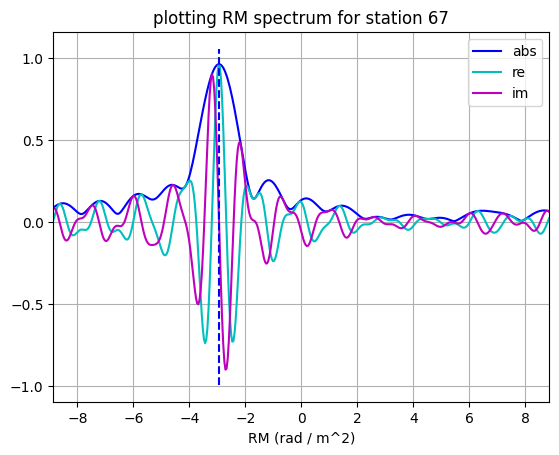

In [2]:
ddir = "/data/EOS_1/mit183"
bandpass_polarisation.run(
    {
        # Required external data
        "gleamfile": f"{ddir}/gleamegc.dat",
        "eb_ms": f"{ddir}/SKA/SP-4626/OSKAR_MOCK.ms",
        "eb_coeffs": f"{ddir}/SKA/SP-4626/ska-sdp-func-everybeam/coeffs",
        # Other parameters
        "ms_name": "demo.ms",
        "hdf5_name": "demo.hdf5",
    }
)